In [305]:
import overpass
import osmnx as ox
from shapely.geometry import box

# define the bounding box of the area you're interested in
bbox = (43.634644, 39.635672, 43.677542, 39.704246)  # (south, west, north, east)

# New York (40.6318, -74.1397,40.7867,-73.8278)
# define the query to retrieve all parks and forests within the bounding box
query = """

(
   relation["landuse"="grass"]({0});
   relation["natural"="wood"]({0});
   relation["leisure"="park"]({0});
   relation["landuse"="forest"]({0});
);
out center;
""".format(",".join(str(x) for x in bbox))

# execute the query using the overpass API
api = overpass.API()
response = api.Get(query)

# print the names of all parks and forests returned by the query
green_space_ids = []
for feature in response['features']:
    if 'id' in feature:
        green_space_ids.append((feature['id']))
    


UnknownOverpassError: Received corrupt data from Overpass (incomplete polygon).

In [371]:
from shapely.geometry import box


# Define the bounding box coordinates
north, south, east, west = 43.677542, 43.634644, 39.704246, 39.635672

def get_green_space_areas(north, south, east, west):
    tags = {"leisure": ["park", "nature_reserve", "playground", "garden"],
            "landuse": ["recreation_ground", "meadow", "forest", "grass"],
            "natural": ["wood"]}

    gdf = ox.geometries_from_bbox(north, south, east, west, tags=tags)
    gdf = gdf[(gdf["geometry"].geom_type == "MultiPolygon") | (gdf["geometry"].geom_type == "Polygon")]
    bbox_polygon = gpd.GeoDataFrame({'geometry': [box(west, south, east, north)]}, crs=gdf.crs)
    gdf = gpd.overlay(bbox_polygon, gdf, how='intersection')
    gdf = gdf.to_crs({'init': 'epsg:3857'})
    green_rate = sum(gdf.geometry.area)

    return green_rate, gdf

green_rate, gdf = get_green_space_areas(north, south, east, west)
print(green_rate)

16659023.198650103


/opt/homebrew/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [356]:
import folium

# Create a folium map centered on the bounding box
m = folium.Map(location=[(north+south)/2, (east+west)/2], zoom_start=13)

# Add the green space polygons to the map as GeoJSON layers
folium.GeoJson(gdf).add_to(m)

# Display themap
m

In [343]:
# Retrieve the green space polygons from OSM
gdf = ox.geometries_from_bbox(north, south, east, west, tags=tags)

In [345]:
gdf

geometry  \
element_type osmid                                                           
node         7218343423                          POINT (39.65121 43.66275)   
             7255877302                          POINT (39.68308 43.64424)   
way          54613233    POLYGON ((39.65421 43.65708, 39.65408 43.65726...   
             54622660    POLYGON ((39.65685 43.65562, 39.65736 43.65520...   
             54622661    POLYGON ((39.65932 43.65543, 39.65881 43.65490...   
...                                                                    ...   
relation     11159923    MULTIPOLYGON (((39.66552 43.66164, 39.66552 43...   
             13030718    POLYGON ((39.65433 43.66449, 39.65415 43.66420...   
             14206738    MULTIPOLYGON (((39.66839 43.65827, 39.66842 43...   
             14206739    POLYGON ((39.67591 43.65623, 39.67588 43.65636...   
             14206740    POLYGON ((39.66453 43.66137, 39.66647 43.66172...   

                        access     leisure  \
element_type osmid                           
node         7218343423    NaN  playground   
             7255877302    NaN  playground   
way          54613233      NaN         NaN   
             54622660      NaN        park   
             54622661      NaN        park   
...                        ...         ...   
relation     11159923      NaN         NaN   
             13030718      NaN         NaN   
             14206738      NaN         NaN   
             14206739      NaN         NaN   
             14206740      NaN         NaN   

                                                                     nodes  \
element_type osmid                                                           
node         7218343423                                                NaN   
             7255877302                                                NaN   
way          54613233    [687498231, 687498232, 687498233, 687498235, 6...   
             54622660    [687632087, 687632068, 687632066, 687632090, 6...   
             54622661    [687392856, 687632090, 687632066, 687632068, 6...   
...                                                                    ...   
relation     11159923    [[[4444932662, 4444932663, 4444932665, 4444932...   
             13030718    [[[7277014861, 7218558045, 8959460041, 7277014...   
             14206738    [[[556178025, 6837885564, 556178045], [5561780...   
             14206739    [[[687710499, 687710500, 687710501, 687710554,...   
             14206740    [[[2327082305, 4410741094, 4410741110, 2327082...   

                        landuse                            name natural  \
element_type osmid                                                        
node         7218343423     NaN                             NaN     NaN   
             7255877302     NaN                             NaN     NaN   
way          54613233    meadow                             NaN     NaN   
             54622660       NaN  Гостиничный комплекс "Дагомыс"     NaN   
             54622661       NaN                             NaN     NaN   
...                         ...                             ...     ...   
relation     11159923     grass                             NaN     NaN   
             13030718     grass                             NaN     NaN   
             14206738       NaN                             NaN    wood   
             14206739    meadow                             NaN     NaN   
             14206740       NaN                             NaN    wood   

                                                                      ways  \
element_type osmid                                                           
node         7218343423                                                NaN   
             7255877302                                                NaN   
way          54613233                                                  NaN   
             54622660                                                  

In [344]:
gdf.loc[('realation', 2730810)]

KeyError: 'realation'

In [ ]:
import time
import random

def get_oms_region(id_):
    """Get info about object in OSM by its id"""
    query = f"""
        way({id_});
        (._;>;);
        out body;
    """
    response = api.Get(query)['features']
    time.sleep(random.randrange(1, 10, 1)/10)
    return response

green_space_data = [get_oms_region(id_) for id_ in green_space_ids]

In [293]:
green_space_dfs = []
for i, resp in zip(green_space_ids, green_space_data):
    df = pd.DataFrame(resp)
    df['object_id'] = i
    green_space_dfs.append(df)

In [294]:
df = pd.concat(green_space_dfs, axis=0)

In [295]:
import geopandas as gpd
import pandas as pd
import numpy as np

df['Longitude'] = df['geometry'].apply(lambda x: x['coordinates'][0] if x['coordinates'] else None)
df['Latitude'] = df['geometry'].apply(lambda x: x['coordinates'][1] if x['coordinates'] else None)
df.dropna(inplace=True)
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(x=df.Longitude, y=df.Latitude), crs=4326
)
gdf = gdf.to_crs(epsg=4326)

In [296]:
gdf.explore()

In [297]:
from shapely.geometry import Polygon, MultiPolygon
from scipy.spatial import ConvexHull, Delaunay
from concave_hull import concave_hull

green_zones = []
green_zones_area = []
for id_ in gdf['object_id'].unique():
    object_gdf = gdf[gdf['object_id'] == id_]
    points = object_gdf.geometry

    polygon = Polygon(concave_hull([(p.x, p.y) for p in points]))
    green_zones.append(polygon)
    green_zones_area.append(polygon.area)

In [298]:
gseries = gpd.GeoSeries(green_zones[2], crs=4326)

# Convert the GeoSeries object to a GeoPandas dataframe
total_gdf = gpd.GeoDataFrame(geometry=gseries)
total_gdf.explore()

In [302]:
print(sum(green_zones_area))

5.970068049999041e-05


# SentinelHub connection

Здесь мы подключаемся к SentinelHub и выгружаем снимок для конкретного участка на карте. Выгружается не просто один снимок, а мозайка из снимков, для минимизации мутных изображений из-за облаков.

In [137]:
from sentinelhub import SHConfig

config = SHConfig()

config.sh_client_id = '83bdb8ff-bcd4-4d56-a681-61b173acfada'
config.sh_client_secret = 'p6m!6/IKpF|cD:t>/xm9I}dr5!QjlyRw>#DeNiya'

config.save("my-profile")

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [138]:
config = SHConfig("my-profile")

In [139]:
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np

from sentinelhub import (
    CRS,
    BBox,
    DataCollection,
    DownloadRequest,
    MimeType,
    MosaickingOrder,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
)

# The following is not a package. It is a file utils.py which should be in the same folder as this notebook.
# from utils import plot_image

In [140]:
# Sochi : 39.15,43.38,40.12,44.03
betsiboka_coords_wgs84 = (39.806638,43.531032,39.838096,43.552844)  # (46.16, -16.15, 46.51, -15.58)

resolution = 10
betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)
betsiboka_size = bbox_to_dimensions(betsiboka_bbox, resolution=resolution)

print(f"Image shape at {resolution} m resolution: {betsiboka_size} pixels")

evalscript_true_color = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

request_true_color = SentinelHubRequest(
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L1C,
            time_interval=("2022-06-01", "2022-06-30"),
            mosaicking_order=MosaickingOrder.LEAST_CC,
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=betsiboka_bbox,
    size=betsiboka_size,
    config=config,
)

true_color_imgs = request_true_color.get_data()

Image shape at 10 m resolution: (252, 245) pixels


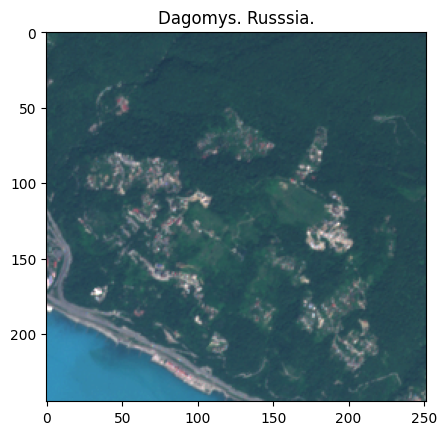

In [191]:
import matplotlib.pyplot as plt

def convert_image(img, factor):
    img = factor / 255 * img
    img = np.where(img > 1, 1, img)
    img = np.where(img < 0, 0, img)
    return img
img = convert_image(true_color_imgs[0], 3.5)
plt.figure()
plt.title("Dagomys. Russsia.")
plt.imshow(img);

In [204]:
img_copy = img.copy()
heat_map = np.zeros((img.shape[0], img.shape[1]))
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        if img[x, y, 1] > img[x, y, 0] and img[x, y, 1] > img[x, y, 2]:
            img_copy[x, y, 0], img_copy[x, y, 2] = 0, 0
            
        heat_map[x, y] = np.linalg.norm(img[x, y, :] - [0, 1, 0])
#         a, b = img[x, y, :], [0, 1, 0]
#         heat_map[x, y] = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

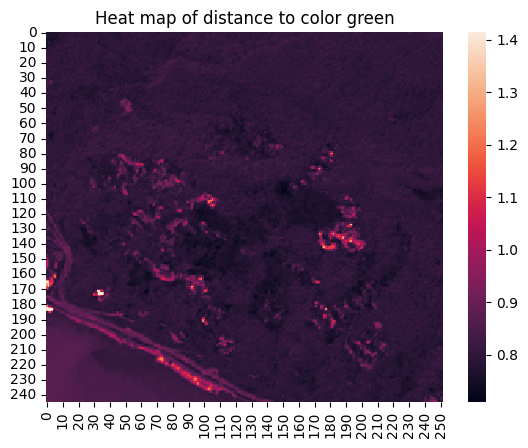

In [209]:
import seaborn as sns

plt.figure()
plt.title("Heat map of distance to color green")
sns.heatmap(heat_map);

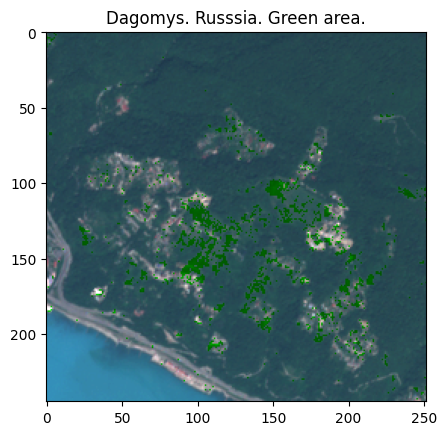

In [256]:
plt.figure()
plt.title("Dagomys. Russsia. Green area.")
plt.imshow(img_copy);

In [275]:
import cv2

img_raw = (img * 255).astype(int)

# Threshold the hue and saturation channels# Set the lower and upper green color thresholds
lower_green = np.array([60, 50, 50])
upper_green = np.array([150, 255, 255])

# Create a binary mask of the green pixels
mask = cv2.inRange(img_raw, lower_green, upper_green)

# Apply the binary mask to the original image
green_pixels = cv2.bitwise_and(img_raw, img_raw, mask=mask)

In [276]:
img_raw[220, 23], mask[220, 23]

(array([ 52, 136, 171]), 0)

In [249]:
all(img_raw[50, 220] >= lower_green) and all(img_raw[50, 220] <= upper_green)

False

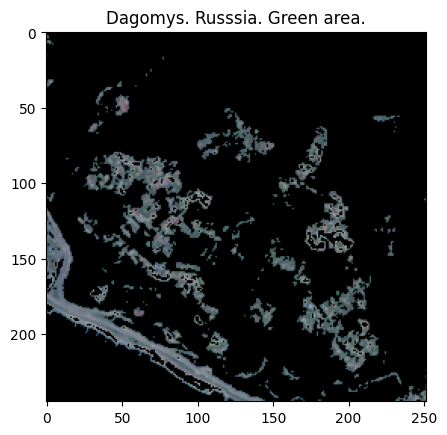

In [277]:
plt.figure()
plt.title("Dagomys. Russsia. Green area.")
plt.imshow(green_pixels);

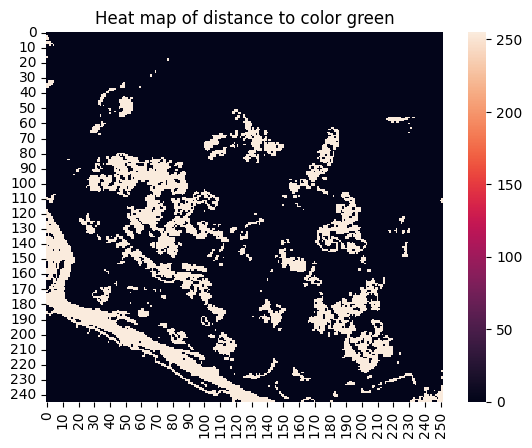

In [278]:
plt.figure()
plt.title("Heat map of distance to color green")
sns.heatmap(mask);

In [ ]:
heat_ampa

In [201]:
mask.shape

(245, 252)

In [285]:
heat_map = np.ones((img_raw.shape[0], img_raw.shape[1]))
for x in range(img_raw.shape[0]):
    for y in range(img_raw.shape[1]):     
        if all(img_raw[x, y, :] >= lower_green) and all(img_raw[x, y, :] <= upper_green):
            heat_map[x, y] = 0

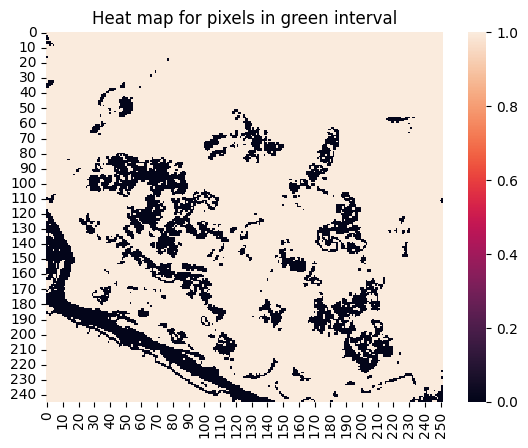

In [286]:
plt.figure()
plt.title("Heat map for pixels in green interval")
sns.heatmap(heat_map);

In [288]:
shape = heat_map.shape[1] * heat_map.shape[0]

total_area = sum(sum(heat_map)) / shape
print("Green rate for current area:", total_area)

Green rate for current area: 0.8542274052478134


## Save the image to the local folder.

In [251]:
heat_map[:100]

TypeError: 'int' object is not subscriptable

In [142]:
from PIL import Image

# convert the numpy array to a PIL Image object
img_array = np.interp(img, (0, 1), (0, 255)).astype(np.uint8)
image = Image.fromarray(img_array)

# save the image to a jpg file on local storage
image.save("example.jpg")

In [ ]:
np.interp(img, (0, 1), (0, 255)).astype(np.uint8)